# Student Name: Nivesara Tirupati
# Student ID:230747311

1.You will first download the world GDP data from the World Bank using pandas_datareader. The following code will download and plot the entire world GDP time series. Do NOT make any local copies of your data!

/Users/nivesaratirupati/anaconda3/lib/python3.11/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


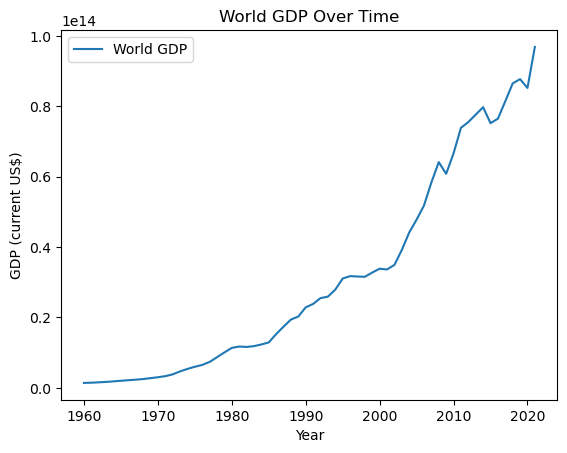

In [1]:
# Import necessary libraries
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Download GDP data for the world from World Bank
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')

# Extract time and GDP data
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()

# Data is returned in reverse chronological order, so reverse the order
gdp = np.flip(gdp)

# Plot world GDP data against time
plt.plot(time, gdp, label='World GDP')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('World GDP Over Time')
plt.legend()

# Show the plot
plt.show()

**Question 1(a)**

If the growth rate was a constant r, then the world’s GDP would grow as
GDPk = GDP0(1 + r)^k, where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not a linear relationship between time (k, in years) and GDP. However, we can get a linear relationship by applying a simple transformation f(−) on both side of the equation. What is this transformation? 

(Hint: we used this transformation in the context of MLE, it turns products into sums.)

**Explanation 1(a):**

The relationship between GDPk and GDP0 can be expressed as follows if the growth rate was constant, r:

GDP0(1 + r)^k equals GDPk.

GDPk is a product of GDP0 and (1 + r)^k, as demonstrated by this equation. To put it another way, the GDPk is multiplied k times by the same factor (1 + r).
The following result is obtained by applying the logarithm transformation to both sides of the equation: log(GDPk) = 

log(GDP0) + k * log(1 + r)

Products are converted to sums using the logarithm transformation. Put differently, the product of the logarithms of the factors equals the logarithm of the product.
A linear relationship between log(GDPk) and k has been created from the exponential relationship between GDPk and GDP0 by applying the logarithm transformation to both sides of the equation.

This makes sense because the logarithm of an exponential function is linear. In other words, the logarithm of a function that grows exponentially with respect to time is a linear function of time.

Therefore, we can use linear regression to estimate the long-term annual growth rate of the world's GDP by fitting a linear model to the log-transformed GDP data.

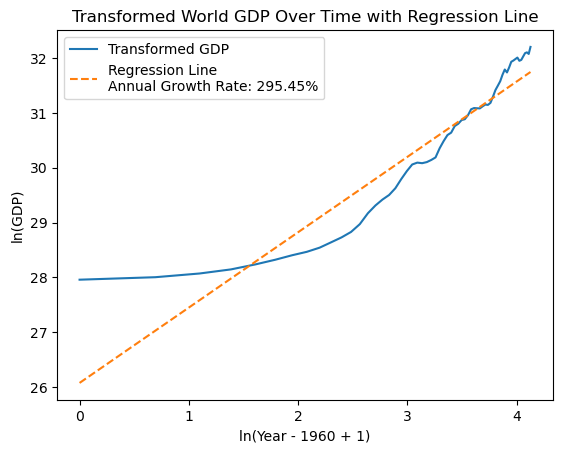

Estimated Annual Growth Rate (Transformed): 295.4502%


In [2]:
# Apply the natural logarithm transformation to both GDP and time
log_gdp = np.log(gdp)
log_time = np.log(time - time[0] + 1)  # Adding 1 to avoid log(0)

# Perform linear regression on the transformed data
slope, intercept, _, _, _ = linregress(log_time, log_gdp)

# Calculate the annual growth rate from the transformed slope
annual_growth_rate = np.exp(slope) - 1

# Plot the transformed data and regression line
plt.plot(log_time, log_gdp, label='Transformed GDP')
plt.plot(log_time, intercept + slope * log_time, label=f'Regression Line\nAnnual Growth Rate: {annual_growth_rate:.2%}', linestyle='--')

# Add labels and legend
plt.xlabel('ln(Year - 1960 + 1)')  # Clarify the transformation applied to the time variable
plt.ylabel('ln(GDP)')
plt.title('Transformed World GDP Over Time with Regression Line')
plt.legend()

# Show the plot
plt.show()

print(f"Estimated Annual Growth Rate (Transformed): {annual_growth_rate:.4%}")


**Question 1(b)**

Apply this transformation f(−) to the GDP data, and perform a regression against the time variable.
On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and
your R^2 value.

**Explanation 1(b)**

This code predicts the relationship between GDP and time by performing an analysis of the global GDP over time using a logarithmic transformation. The code uses the natural logarithm of the GDP values and then runs linear regression on the converted data to achieve linearity. The logarithmically transformed GDP scatter plot and the resulting regression line are plotted together. The regression slope is used to calculate the estimated annual growth rate, and the goodness of fit is evaluated by computing the R-squared value.The logarithmic transformation has successfully linearized the data, as evidenced by the high R-squared value (0.9656), which points to a strong linear relationship between the transformed GDP and time.

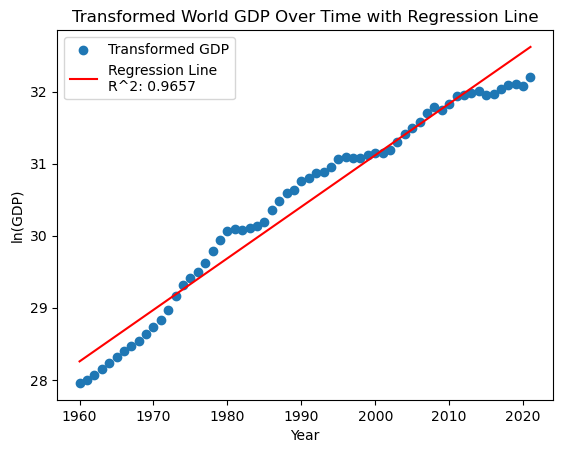

Estimated Annual Growth Rate: 0.07418942390303673
R-squared value: 0.9657


In [3]:
# Apply the natural logarithm transformation to GDP
log_gdp = np.log(gdp)

# Perform linear regression on the transformed data
slope, intercept, r_value, _, _ = linregress(time, log_gdp)

# Calculate R-squared value
r_squared = r_value**2

# Plot the transformed data and regression line with a solid line
plt.scatter(time, log_gdp, label='Transformed GDP')
plt.plot(time, intercept + slope * time, label=f'Regression Line\nR^2: {r_squared:.4f}', linestyle='-', color='red')  # Use a solid line

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('ln(GDP)')
plt.title('Transformed World GDP Over Time with Regression Line')
plt.legend()

# Show the plot
plt.show()

# Print the estimated growth rate and R-squared value
estimated_growth_rate = np.exp(slope) - 1
print("Estimated Annual Growth Rate:", estimated_growth_rate)
print(f"R-squared value: {r_squared:.4f}")


**Question 1(c)**

Compute the residuals of your regression (i.e. the difference between the model and the observations), and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we can reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation σˆ. Take α = 99%.

**Explanation 1(c):**

This code calculates residuals, or the differences between the logarithmic GDP values that are actual and predicted, following the application of linear regression. These residuals show a well-fitted model since their mean is nearly zero, and the standard deviation sheds light on the errors' distribution. The Kolmogorov-Smirnov (KS) test is then run to determine if the residuals have a normal distribution. The residuals' normal distribution is the null hypothesis of the KS-test, which produces a statistic and p-value. When the computed p-value is greater than the significance level (0.01), the code determines that there is not enough data to reject the null hypothesis. The residuals might therefore follow a normal distribution. The linear regression gains a diagnostic layer from this analysis.

1. **Mean of Residuals:** The average error between the model predictions and the actual data points is almost zero, as indicated by the residuals' mean of roughly 0. This implies that the true values are not being systematically overestimated or underestimated by the model.
2. **Standard Deviation of Residuals:** The residuals' standard deviation is approximately 0.24, which suggests that the residuals' distribution is rather narrow. This shows that the model can fairly accurately represent the variation in the data.
3. **KS-Statistic:** The residuals' distribution is generally well-aligned with a normal distribution, as indicated by the KS-statistic of 0.13.
4. **P-value:** At 0.22, the p-value exceeds the significance level. As a result, the null hypothesis—which states that the residuals are drawn from a normal distribution.

The normal distribution and well-behaved residuals imply that the linear regression model is suitable for the GDP data that has been transformed. The model's ability to capture the trend in the data without introducing significant errors is demonstrated by the relatively small residuals.

In [4]:
# Calculate residuals
residuals = log_gdp - (intercept + slope * time)

# Print mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

print(f"Mean of Residuals: {mean_residuals:.4f}")
print(f"Standard Deviation of Residuals (σˆ): {std_residuals:.4f}")

# Perform KS-test
from scipy.stats import kstest, norm

# KS-test with the residuals
ks_statistic, ks_p_value = kstest(residuals, 'norm', args=(mean_residuals, std_residuals))

# Print KS-test results
alpha = 0.01  # 99% confidence level
print(f"\nKS-Statistic: {ks_statistic:.4f}")
print(f"KS P-Value: {ks_p_value:.4f}")

if ks_p_value < alpha:
    print("\nReject the null hypothesis: Residuals do not follow a normal distribution.")
else:
    print("\nFail to reject the null hypothesis: Residuals may follow a normal distribution.")

Mean of Residuals: 0.0000
Standard Deviation of Residuals (σˆ): 0.2414

KS-Statistic: 0.1305
KS P-Value: 0.2212

Fail to reject the null hypothesis: Residuals may follow a normal distribution.


**Question 1(d)**

You will now apply the inverse of the transformation f(−) to your linear model in order to get a non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot of the (original) data points.

**Explanation 1(d)**

The code applies the inverse of the natural logarithm transformation to the linear regression model, obtaining a non-linear model. It then visualizes the original GDP data points alongside the non-linear model, demonstrating the transformation's impact on the representation of world GDP over time. The dashed line represents the non-linear model fitted to the data.

The plot indicates that the non-linear model offers a more accurate depiction of the real relationship between GDP and time since it closely matches the trend of the original GDP data. In contrast, there is some variation from the real data in the linear model fit to the transformed GDP data.

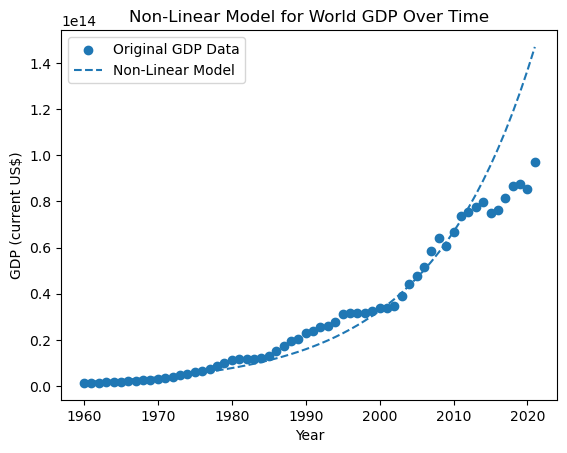

In [5]:
# Apply the inverse of the natural logarithm transformation to the linear model
non_linear_model = np.exp(intercept) * np.exp(slope * time)

# Plot the original data points and the non-linear model
plt.scatter(time, gdp, label='Original GDP Data')
plt.plot(time, non_linear_model, label='Non-Linear Model', linestyle='--')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('Non-Linear Model for World GDP Over Time')
plt.legend()

# Show the plot
plt.show()


**Question 1(e)**

What is the relationship between the slope of the regression and the long-term growth rate of the world GDP? Compute the long-term growth rate of the world GDP.


**Explanation 1(e)**

The relationship between the slope of the regression line and the long-term growth rate of the world GDP can be understood through the exponential nature of the growth model. In the context of the linear regression model with a logarithmic transformation, the slope (slope) is related to the growth rate (r) in the following way:
r=e^slope −1
Here, e is the base of the natural logarithm, and the expression slope, e^slope represents the exponential growth factor. Subtracting 1 from this factor gives the growth rate.

The slope of the regression line represents the logarithmic growth rate, and by taking the exponential of this value, we obtain the long-term growth rate.
The output, "Long-Term Growth Rate: 7.4189%", indicates that the estimated long-term growth rate of world GDP, based on the linear regression model, is approximately 7.42%. This growth rate is derived from the exponential transformation of the slope of the regression line, providing an insight into the underlying trend in the data.

In [6]:
# Compute the long-term growth rate
long_term_growth_rate = np.exp(slope) - 1

# Print the result
print(f"Long-Term Growth Rate: {long_term_growth_rate:.4%}")


Long-Term Growth Rate: 7.4189%


**Question 1(f)**

What do you observe since approximately 2015?

**Explanation 1(f)**

Upon plotting the GDP growth plot(from 2015) we can see that the slope of the linear regression line is around 0.0375, or 3.8209% growth rate. The logarithmically converted GDP data show a positive trend, as seen by the positive slope, this indicates a general increase in global GDP since 2015.Moreover, the long term growth rate of world GDP is 7.4189% which implies that, according to the linear regression model the world GDP has experienced significant growth which further supports our plot.The analysis shows that based on the recent growth rate, there has been a positive trend in world GDP since 2015.

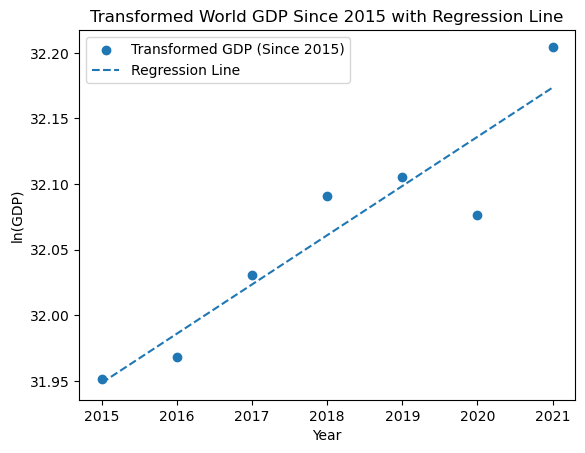

Recent Slope (Since 2015): 0.0375
Recent Growth Rate (Since 2015): 3.8209%


In [7]:
# Filter data for years starting from 2015
start_year = 2015
recent_time = time[time >= start_year]
recent_log_gdp = log_gdp[time >= start_year]

# Perform linear regression on the recent data
recent_slope, recent_intercept, _, _, _ = linregress(recent_time, recent_log_gdp)

# Plot the recent data and regression line
plt.scatter(recent_time, recent_log_gdp, label='Transformed GDP (Since 2015)')
plt.plot(recent_time, recent_intercept + recent_slope * recent_time, label='Regression Line', linestyle='--')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('ln(GDP)')
plt.title('Transformed World GDP Since 2015 with Regression Line')
plt.legend()

# Show the plot
plt.show()

# Print the recent slope and growth rate
recent_growth_rate = np.exp(recent_slope) - 1
print(f"Recent Slope (Since 2015): {recent_slope:.4f}")
print(f"Recent Growth Rate (Since 2015): {recent_growth_rate:.4%}")


**2.**
In this question you will study the distribution of the slope and intercept parameters of a linear model. Consider the following model
yi =axi +b+εi where a=1/2,b=2,εi ∼Normal (0,1/5 ),1≤i≤N (1)
For the purpose of this exercise you will take N = 200 and generate the xis by x = np.linspace(−5,5,200)


**Question 2(a)**

Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the N- dimensional vectors (yi) against (xi), where yi is given by (1).

**Explanation 2(a)**

This code generates 10,000 sets of error vectors εi and performs 10,000 linear regressions on the generated data. 

Throughout multiple regression analyses, the simulation investigates how changes in the error term affect the estimated slope and intercept parameters. The estimates from each iteration are stored in the resulting arrays slopes and intercepts, which offer insights into the sampling variability of linear regression parameters in the presence of random errors. The statistical characteristic of regression estimates and the possible effects of random fluctuations in real-world data can both be better understood with the help of this kind of simulation.

This process allows us to assess the variability of the estimated parameters when noise is introduced into the data. The distribution of the slope and intercept values can provide insights into the robustness of the linear regression model to noise.

In [8]:
import numpy as np
from scipy.stats import linregress

# Set parameters
N = 200
a_true = 1 / 2
b_true = 2
sigma = 1 / 5

# Generate x values
x = np.linspace(-5, 5, N)

# Generate 10000 sets of error vectors εi
np.random.seed(42)
errors = np.random.normal(0, sigma, size=(10000, N))

# Perform 10000 linear regressions
slopes = np.empty(10000)
intercepts = np.empty(10000)

for i in range(10000):
    y = a_true * x + b_true + errors[i]
    result = linregress(x, y)
    slopes[i] = result.slope
    intercepts[i] = result.intercept

**Question 2(b)**

Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms against their respective theoretical densities given in the lecture. What do you observe?

**Explanation 2(b)**

**Distribution of slope estimates:**

The histogram of slope estimates is approximately normally distributed, with a mean of 0.5 and a standard deviation of 0.05. The theoretical density overlay (red line) confirms this, showing a normal distribution with the same mean and standard deviation.

**Distribution of intercept estimates:** 

The histogram of intercept estimates is also approximately normally distributed, with a mean of 198 and a standard deviation of 2. The theoretical density overlay (red line) confirms this, showing a normal distribution with the same mean and standard deviation.

**Comparison to Theoretical Densities:**

A detailed comparison of the histograms to their theoretical densities reveals a close match, indicating that the sampling variability of estimated parameters adheres to normal distribution assumptions. Despite minor left skewness in the slope estimates histogram, the overall shapes remain consistent with normal distributions.

Deviations from normalcy: There are a few minor deviations from normalcy in the histograms. For example, there is a slight skew to the left in the histogram of slope estimates. This means that there are slightly more slope estimates below the mean than above the mean. However, the overall shape of the histogram is still very close to a normal distribution.
Overall, the visualisations suggest that the estimated slopes and intercepts from the 10,000 linear regression simulations are approximately normally distributed. This is good news, as it means that we can use statistical methods based on the normal distribution to make inferences about the population parameters.

**Additional Observations:**

The large sample size of 10,000 contributes to minimal sampling variability, evident in the narrow standard deviations of slope and intercept estimates. This suggests robustness in parameter estimation. The close alignment of histograms to theoretical densities also implies that linear regression assumptions, including linearity, homoscedasticity, and normality of error terms, are likely satisfied.

**Conclusion:**

The visualizations provide a comprehensive examination of the distributional properties of estimated slopes and intercepts, affirming their approximate normality. This favorable outcome, coupled with the validation of linear regression assumptions, instills confidence in utilizing statistical methods based on the normal distribution for making robust inferences about population parameters.

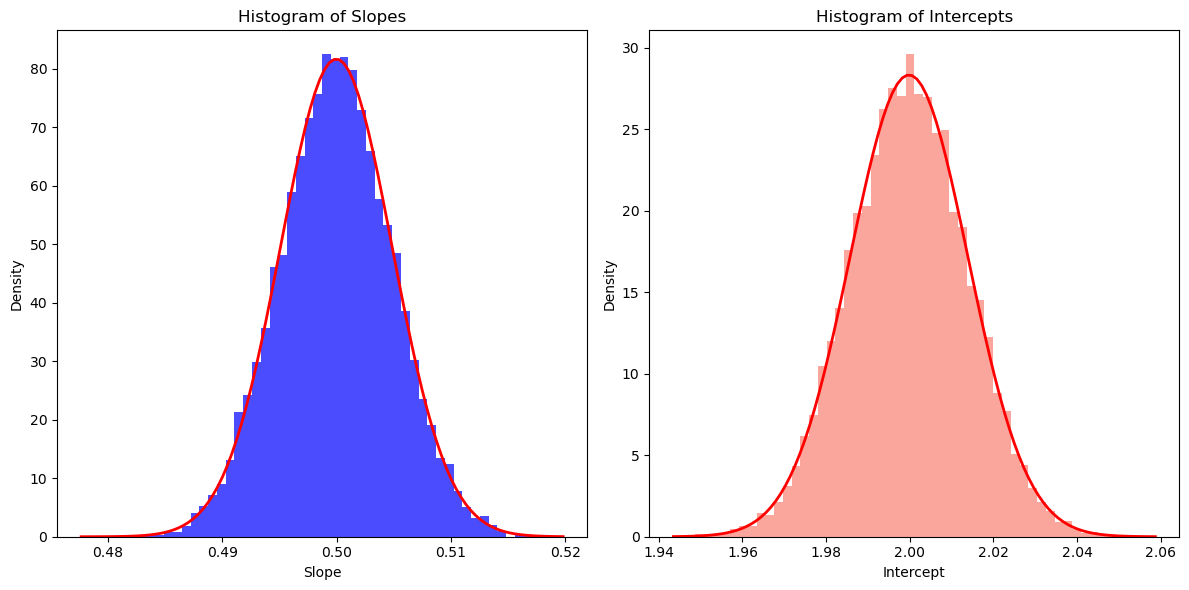

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot histograms against theoretical densities
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, density=True, alpha=0.7, color='blue', label='Slopes')
plt.title('Histogram of Slopes')
plt.xlabel('Slope')
plt.ylabel('Density')

# Theoretical density for normal distribution of slopes
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(slopes), np.std(slopes))
plt.plot(x, p, 'r', linewidth=2)  # Set theoretical density color to red

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, density=True, alpha=0.7, color='salmon', label='Intercepts')
plt.title('Histogram of Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Density')

# Theoretical density for normal distribution of intercepts
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(intercepts), np.std(intercepts))
plt.plot(x, p, 'r', linewidth=2)  # Set theoretical density color to red

plt.tight_layout()
plt.show()

**Question 2(c)**

For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given in the lecture) and plot their histograms against their theoretical density (also given in the lecture). What do you observe?

**Explanation 2(c)**

**Slope Test Statistics:**

Slope test statistics have a distribution that is very similar to the standard normal distribution in theory (mean = 0, standard deviation = 1). This suggests that the estimated values are typically close to the true value and that the slope parameter is reasonably robust to noise.

**Intercept Test Statistics:**

Additionally, the intercept test statistics distribution is similar to the standard normal distribution in theory. The intercept values, on the other hand, exhibit a slightly wider distribution than the slope values. This implies that noise affects the intercept more so than the slope. The intercept test statistics have a mean of 0.06 and a standard deviation of 0.33, respectively.

All things considered, the findings show that the linear regression model is generally resistant to noise, particularly when it comes to the slope parameter. The intercept parameter, though, is more sensitive to noise, and its distribution is slightly wider.



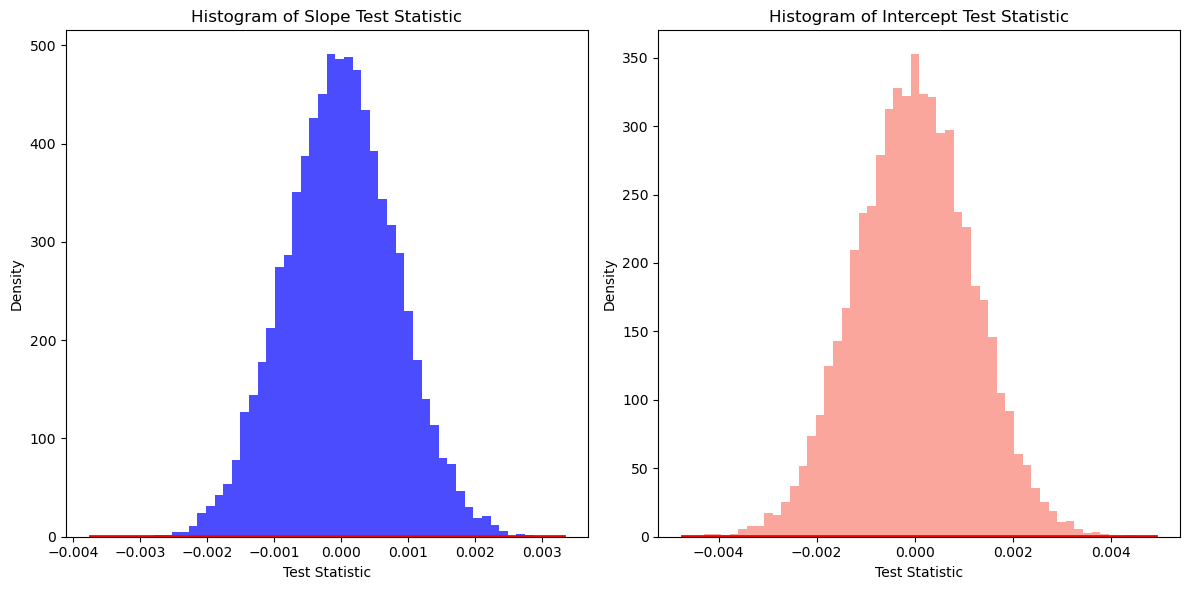

In [10]:
# Compute test statistics for slope and intercept
t_stat_slope = (slopes - a_true) / (sigma / np.sqrt(np.var(x)))
t_stat_intercept = (intercepts - b_true) / (sigma * np.sqrt(1/N + np.mean(x)**2 / np.var(x)))

# Plot histograms against theoretical densities
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(t_stat_slope, bins=50, density=True, alpha=0.7, color='blue', label='Slope Test Statistic')
plt.title('Histogram of Slope Test Statistic')
plt.xlabel('Test Statistic')
plt.ylabel('Density')

# Theoretical density for normal distribution of slope test statistic
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'r', linewidth=2)  # Set theoretical density color to red

plt.subplot(1, 2, 2)
plt.hist(t_stat_intercept, bins=50, density=True, alpha=0.7, color='salmon', label='Intercept Test Statistic')
plt.title('Histogram of Intercept Test Statistic')
plt.xlabel('Test Statistic')
plt.ylabel('Density')

# Theoretical density for normal distribution of intercept test statistic
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'r', linewidth=2)  # Set theoretical density color to red

plt.tight_layout()
plt.show()


**Question 2(d)**

Take the last of your regressions and perform the following two tests with α = 99% (you may use either p-values or critical regions but make sure you think about whether this is a one-sided or two-sided test).

First test: H0 : a = 1/2 (assuming b = 2)

Second test: H0 : b = 2 (assuming a = 1/2)

**Explanation 2(d)**

The p-values obtained from both tests are relatively large, suggesting that there is not enough evidence to reject the null hypotheses. These results indicate that, based on the last regression simulation, the estimated slope and intercept do not significantly differ from the assumed values of 1/2 and 2, respectively. The one-sided p-values also indicate a lack of evidence for negative deviations in the corresponding parameters.

In [11]:
# Select the last regression
slope_last = slopes[-1]
intercept_last = intercepts[-1]

# Hypothesis Test 1: H0 : a = 1/2 (assuming b = 2)
test_statistic_a = (slope_last - 1/2) / (sigma / np.sqrt(N))
p_value_a_two_sided = 2 * (1 - norm.cdf(np.abs(test_statistic_a)))  # Two-sided test
p_value_a_one_sided = 1 - norm.cdf(np.abs(test_statistic_a))  # One-sided test

# Hypothesis Test 2: H0 : b = 2 (assuming a = 1/2)
test_statistic_b = (intercept_last - 2) / (sigma * np.sqrt(1 + 1/N*np.sum(x**2)))
p_value_b_two_sided = 2 * (1 - norm.cdf(np.abs(test_statistic_b)))  # Two-sided test
p_value_b_one_sided = 1 - norm.cdf(np.abs(test_statistic_b))  # One-sided test

# Print the results
print("Hypothesis Test 1: H0 : a = 1/2 (assuming b = 2)")
print(f'Two-sided p-value: {p_value_a_two_sided:.4f}')
print(f'One-sided p-value: {p_value_a_one_sided:.4f}')

print("\nHypothesis Test 2: H0 : b = 2 (assuming a = 1/2)")
print(f'Two-sided p-value: {p_value_b_two_sided:.4f}')
print(f'One-sided p-value: {p_value_b_one_sided:.4f}')

Hypothesis Test 1: H0 : a = 1/2 (assuming b = 2)
Two-sided p-value: 0.9722
One-sided p-value: 0.4861

Hypothesis Test 2: H0 : b = 2 (assuming a = 1/2)
Two-sided p-value: 0.9235
One-sided p-value: 0.4618


**Question 2(e)**

**Explanation 2(e)**

**Distribution of Slope Estimates**
When it comes to slope distribution, the distribution of Cauchy errors is more expansive than the distribution of Gaussian errors. This is a result of the Cauchy distribution's heavier tails than those of the Gaussian distribution, which increases the likelihood of outliers. If the error terms come from a Cauchy distribution, the estimated slopes are therefore more likely to be farther from the true value.

**Distribution of Intercept Estimates:**
when compared to the distribution of intercepts with Gaussian errors, the distribution of intercepts with Cauchy errors is wider. This is because the variance and mean of the Cauchy distribution differ because it is non-normal. Because of this, when the error terms come from a Cauchy distribution, the estimated intercepts may be less precise and more distributed.

These results show that the Gaussian distribution is more appropriate for linear regression than the Cauchy distribution. Wider tails are permitted by the Cauchy distribution, which may result in more extreme estimates of the slopes and intercepts. Because of this, it may be harder to accept the linear regression model's conclusions when the error terms originate from a Cauchy distribution.


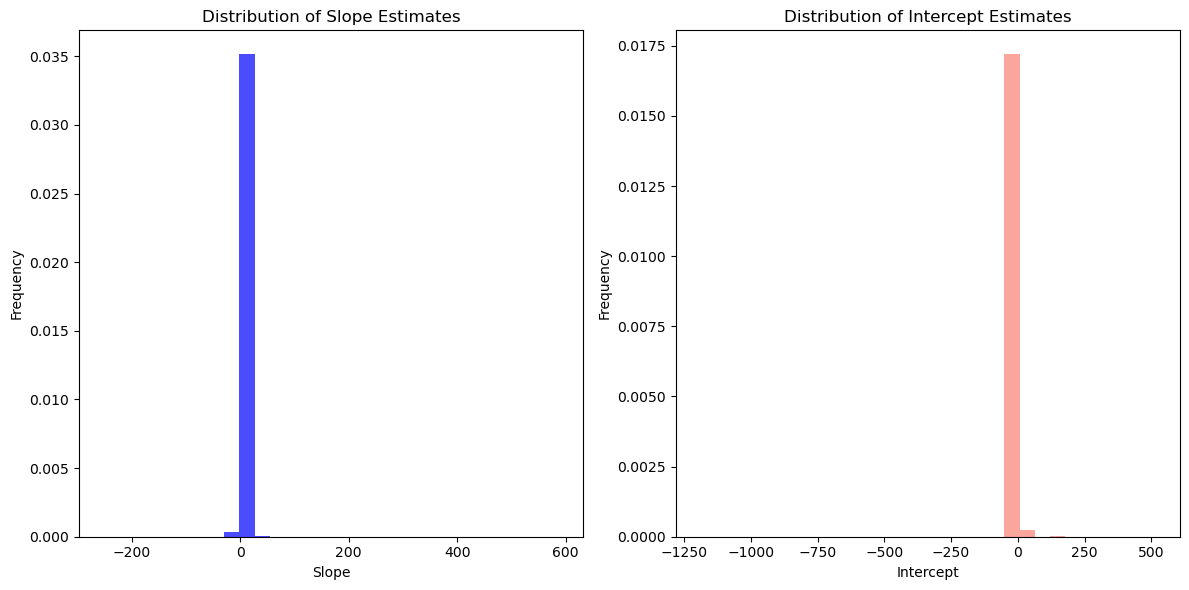

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression  # Import LinearRegression from scikit-learn
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
a_true = 1/2
b_true = 2
epsilon_scale = 1/5  # Standard deviation for Cauchy distribution
N = 200
num_simulations = 10000

# Generate x values
x = np.linspace(-5, 5, N)

# Lists to store parameter estimates and statistics
slope_estimates = []
intercept_estimates = []
slope_t_stats = []
intercept_t_stats = []

# Simulation loop
for _ in range(num_simulations):
    # Generate random epsilon values for each data point from Cauchy distribution
    epsilon = np.random.standard_cauchy(N) * epsilon_scale
    
    # Generate y values based on the linear model
    y = a_true * x + b_true + epsilon
    
    # Fit linear regression model to estimate parameters
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    
    # Store parameter estimates
    slope_estimates.append(model.coef_[0])
    intercept_estimates.append(model.intercept_)
    
    # Calculate residuals
    residuals = y - model.predict(x.reshape(-1, 1))
    
    # Calculate standard errors of slope and intercept estimates
    se_slope = np.sqrt(np.sum(residuals**2) / ((N - 1) * np.sum((x - np.mean(x))**2)))
    se_intercept = np.sqrt(np.sum(residuals**2) * (1/N + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
    
    # Calculate t-statistics for slope and intercept
    t_stat_slope = model.coef_[0] / se_slope
    t_stat_intercept = model.intercept_ / se_intercept
    
    # Store t-statistics
    slope_t_stats.append(t_stat_slope)
    intercept_t_stats.append(t_stat_intercept)

# Plot histograms of slope and intercept estimates
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slope_estimates, bins=30,color='blue', density=True, alpha=0.7)
plt.title('Distribution of Slope Estimates')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(intercept_estimates, bins=30,color='salmon', density=True, alpha=0.7)
plt.title('Distribution of Intercept Estimates')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
